In [1]:
import main
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

## Class of our model

In [2]:
class mlp:
    
    def __init__(self, X, y, alpha=0.00001, hidden_layer_sizes=(0,0)):
        self.X = X
        self.y = y
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        self.clf = MLPClassifier(solver='lbfgs', alpha=alpha, hidden_layer_sizes=hidden_layer_sizes, random_state=1, max_iter=500)
        self.y_pred = self.clf.fit(self.X_train, self.y_train).predict(self.X_test)
        self.mislabeled = (self.y_test != self.y_pred).sum()
        self.accuracy = accuracy_score(self.y_test,self.y_pred)

## Creation of model

In [3]:
def model(n, lines, alpha, hidden_layer_sizes, groups=[]):
    X_nostopwords = main.vectorize(n, lines, stop_words=False)
    if groups:
        X_stopwords = main.vectorize(n, groups, stop_words=False)
    else:
        X_stopwords = main.vectorize(n, lines, stop_words=True)
    y = main.labels
    
    return (mlp(X_stopwords, y, alpha, hidden_layer_sizes), mlp(X_nostopwords, y, alpha, hidden_layer_sizes))

In [4]:
hidden_layer_sizes = [(10,4),(5,4),(2,2)]

On cherche l'hyperparametre alpha (pas du gradient) optimal

In [5]:
alphas = [0.5, 0.1, 0.01, 0.0001, 0.00001]

def find_optimal_hyperparameter():
    results = []
    for a in alphas:
        results.append([(model(i, main.words_only, a, (2,3))[1]).accuracy for i in range(1,5)])
        
    averages = [sum(r)/len(r) for r in results]
    return averages

print(find_optimal_hyperparameter())

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network

[0.7362869198312236, 0.7148382559774965, 0.7390998593530239, 0.7137834036568214, 0.7187060478199718]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


On observe que $\alpha = 0.00001$ donne le meilleur resultat

# Words before and after "interest"

Here are the results of our model with $n$ words before and after "interest" ($n \in 1,...,10$).

In [6]:
words_result = {
                "with_stop":{},
                "without_stop":{}
                }

In [7]:
for size in hidden_layer_sizes:
    words_result["with_stop"][size] = []
    words_result["without_stop"][size] = []
words_result
    

{'with_stop': {(10, 4): [], (5, 4): [], (2, 2): []},
 'without_stop': {(10, 4): [], (5, 4): [], (2, 2): []}}

In [8]:
for i in range(1,21):
    for size in hidden_layer_sizes:
        stop,nostop = model(i, main.words_only, 0.00001,size)
        words_result["with_stop"][size].append(stop)
        words_result["without_stop"][size].append(nostop)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network

# Categories of words

### With stop words

Here are the results of our model with the $n$ categories of the words before and after "interest" ($n \in 1,...,10$).

In [9]:
categories_result = {
                "with_stop":{},
                "without_stop":{}
                }

In [10]:
for size in hidden_layer_sizes:
    categories_result["with_stop"][size] = []
    categories_result["without_stop"][size] = []
categories_result

{'with_stop': {(10, 4): [], (5, 4): [], (2, 2): []},
 'without_stop': {(10, 4): [], (5, 4): [], (2, 2): []}}

In [11]:
for i in range(1,21):
    for size in hidden_layer_sizes:
        stop,nostop = model(i, main.groups_only, 0.00001,size, main.groups_no_stop)
        categories_result["with_stop"][size].append(stop)
        categories_result["without_stop"][size].append(nostop)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network

# Graphes

### Words around "interest"

#### With stop words:

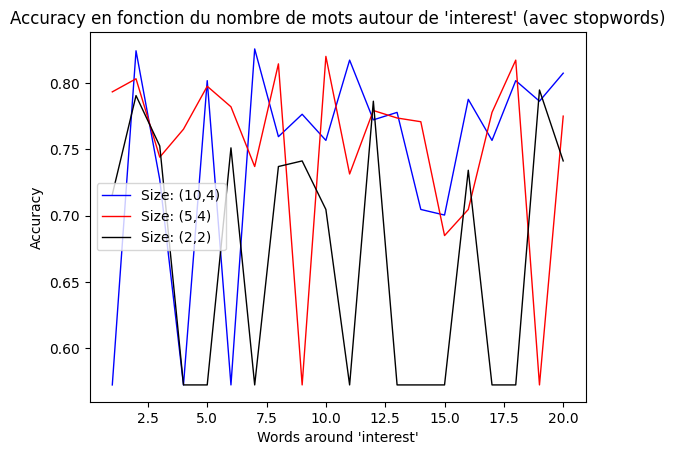

In [12]:
x = range(1,21)
y1 = [[m.accuracy for m in words_result["with_stop"][size]] for size in words_result["with_stop"]]
# y2 = [[m.accuracy for m in words_result["with_stop"][size]] for size in words_result["without_stop"]]

plt.plot(x, y1[0], marker='', color='blue', linewidth=1, label="Size: (10,4)")
plt.plot(x, y1[1], marker='', color='red', linewidth=1, label="Size: (5,4)")
plt.plot(x, y1[2], marker='', color='black', linewidth=1, label="Size: (2,2)")


plt.title("Accuracy en fonction du nombre de mots autour de 'interest' (avec stopwords)")
plt.xlabel("Words around 'interest'")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Without stop words:

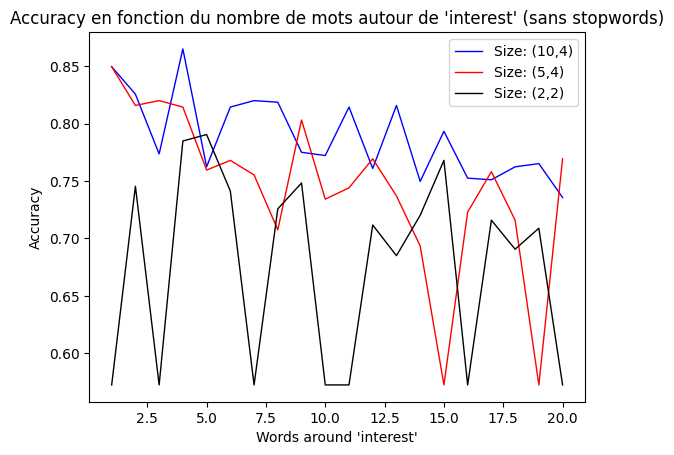

In [13]:
x = range(1,21)
y1 = [[m.accuracy for m in words_result["without_stop"][size]] for size in words_result["without_stop"]]
# y2 = [[m.accuracy for m in words_result["with_stop"][size]] for size in words_result["without_stop"]]

plt.plot(x, y1[0], marker='', color='blue', linewidth=1, label="Size: (10,4)")
plt.plot(x, y1[1], marker='', color='red', linewidth=1, label="Size: (5,4)")
plt.plot(x, y1[2], marker='', color='black', linewidth=1, label="Size: (2,2)")


plt.title("Accuracy en fonction du nombre de mots autour de 'interest' (sans stopwords)")
plt.xlabel("Words around 'interest'")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Categories around "interest"

#### With stop words

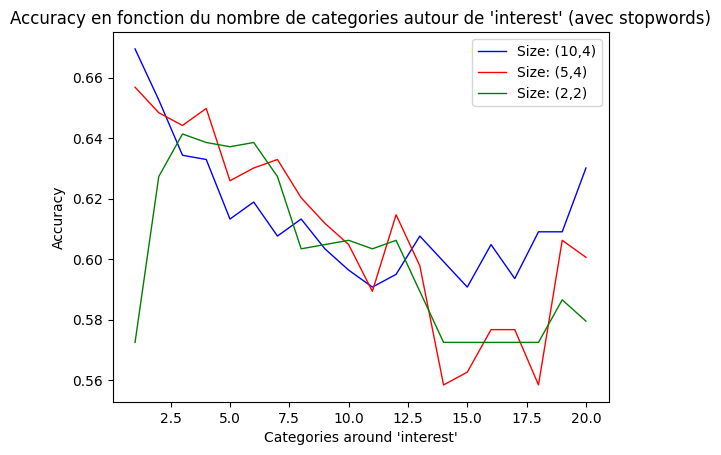

In [14]:
x = range(1,21)
y1 = [[m.accuracy for m in categories_result["with_stop"][size]] for size in categories_result["with_stop"]]
# y2 = [[m.accuracy for m in words_result["with_stop"][size]] for size in words_result["without_stop"]]

plt.plot(x, y1[0], marker='', color='blue', linewidth=1, label="Size: (10,4)")
plt.plot(x, y1[1], marker='', color='red', linewidth=1, label="Size: (5,4)")
plt.plot(x, y1[2], marker='', color='green', linewidth=1, label="Size: (2,2)")


plt.title("Accuracy en fonction du nombre de categories autour de 'interest' (avec stopwords)")
plt.xlabel("Categories around 'interest'")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Without stop words

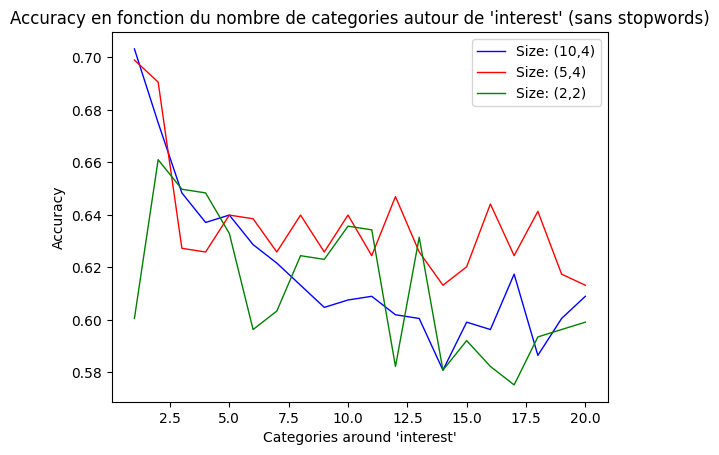

In [15]:
x = range(1,21)
y1 = [[m.accuracy for m in categories_result["without_stop"][size]] for size in categories_result["without_stop"]]
# y2 = [[m.accuracy for m in words_result["with_stop"][size]] for size in words_result["without_stop"]]

plt.plot(x, y1[0], marker='', color='blue', linewidth=1, label="Size: (10,4)")
plt.plot(x, y1[1], marker='', color='red', linewidth=1, label="Size: (5,4)")
plt.plot(x, y1[2], marker='', color='green', linewidth=1, label="Size: (2,2)")


plt.title("Accuracy en fonction du nombre de categories autour de 'interest' (sans stopwords)")
plt.xlabel("Categories around 'interest'")
plt.ylabel("Accuracy")
plt.legend()
plt.show()